<a href="https://colab.research.google.com/github/Mayank783/Hotel_booking_eda/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [53]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [54]:
# Load Dataset

drive.mount('/content/drive/',force_remount=True)

file_path='/content/drive/MyDrive/colab_data/Hotel Bookings.csv'
hotel_db=pd.read_csv(file_path)


Mounted at /content/drive/


In [55]:
import os
os.chdir('/content/drive/MyDrive/colab_data')
!ls

 Cimdb_data.csv.gsheet	'Copy of output_imdb.csv'  'Hotel Bookings.csv'   imdb_data.csv


### Dataset First View

In [56]:
# Dataset First Look
hotel_db.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [57]:
# Dataset Rows & Columns count
print(f"Number of rows is {hotel_db.shape[0]} and number of columns is {hotel_db.shape[1]}")

Number of rows is 119390 and number of columns is 32


### Dataset Information

In [58]:
# Dataset Info
hotel_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [59]:
# Dataset Duplicate Value
hotel_db.duplicated().value_counts()


False    87396
True     31994
dtype: int64

#### Missing Values/Null Values

In [60]:
hotel_db.isna().sum().sort_values(ascending=False)
miss=hotel_db.isna().sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Places of missing values in column')

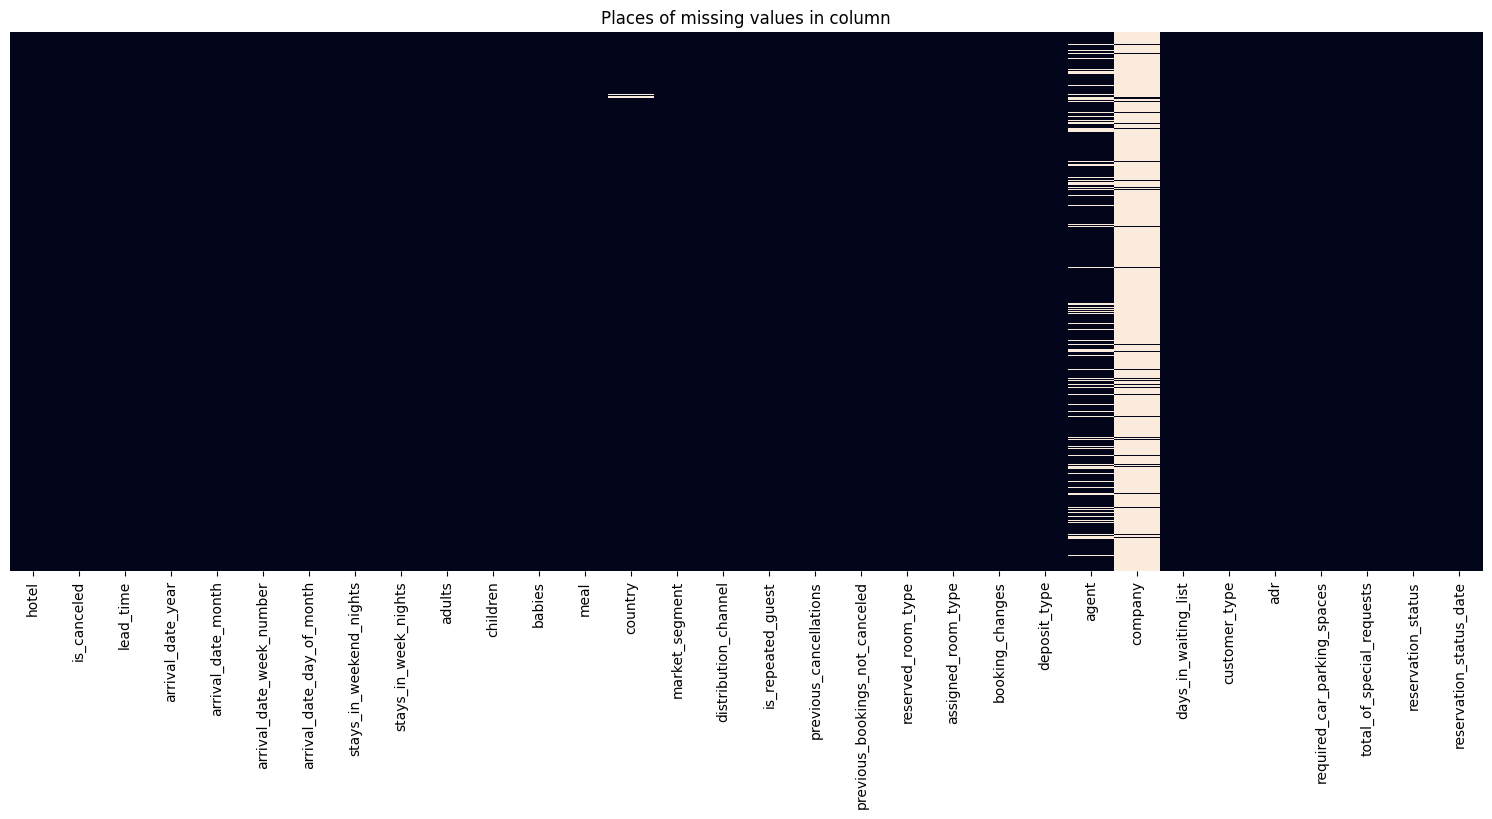

In [61]:
# Visualizing the missing values
plt.figure(figsize=(19,7))
sns.heatmap(hotel_db.isnull(), cbar=False, yticklabels=False)

plt.title("Places of missing values in column")


In [62]:
hotel_db['company'].fillna(0,inplace=True)
hotel_db['agent'].fillna(0,inplace=True)
hotel_db['country'].fillna(0,inplace=True)
hotel_db['children'].fillna(0,inplace=True)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [63]:
# Dataset Columns
hotel_db.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [64]:
# Dataset Describe
hotel_db.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [65]:
# Check Unique Values for each variable.
hotel_db.duplicated().value_counts()

False    87396
True     31994
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [66]:
# Write your code to make your dataset analysis ready.
hotel_db['total_guests']=hotel_db['adults']+hotel_db['children']
hotel_db['total_stay']=hotel_db['stays_in_weekend_nights']+hotel_db['stays_in_week_nights']
hotel_db.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7


In [67]:
hotel_db=hotel_db[hotel_db['adults']+hotel_db['babies']+hotel_db['children']>0]

In [68]:
hotel_db.shape

(119210, 34)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [69]:
hotel_db.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


#**1) Which is the most preffered type of hotel?**


<Axes: title={'center': 'Most preffered type of hotel'}, ylabel='hotel'>

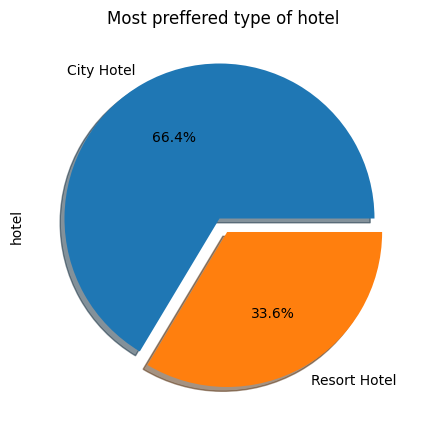

In [70]:
hotel_db['hotel'].value_counts().plot(kind='pie', explode=[0.05,0.05], title='Most preffered type of hotel', figsize=(5,6), autopct='%1.1f%%', shadow=[0.05,0.05])

# **2) Which type of meal customers prefer the most?**

In [71]:
hotel_db['meal'].value_counts().index

Index(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype='object')

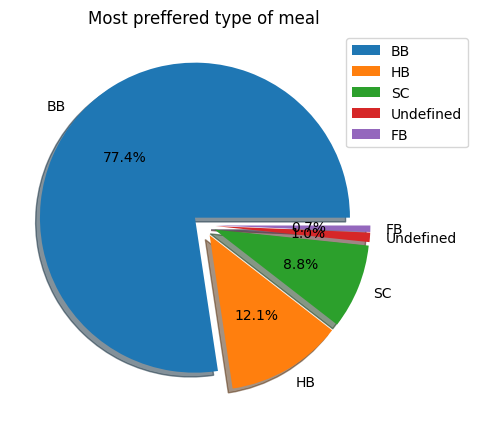

In [72]:
labels=hotel_db['meal'].value_counts().index
hotel_db['meal'].value_counts().plot(kind='pie', explode=[0.075,0.075,0.075,0.075,0.075], title='Most preffered type of meal', figsize=(5,6), autopct='%1.1f%%', shadow=[0.05,0.05,0.05,0.05,0.05], ylabel='')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


# **3) For which months hotels are mostly booked?**

<Axes: title={'center': 'Most prefferd months for hotel booking'}>

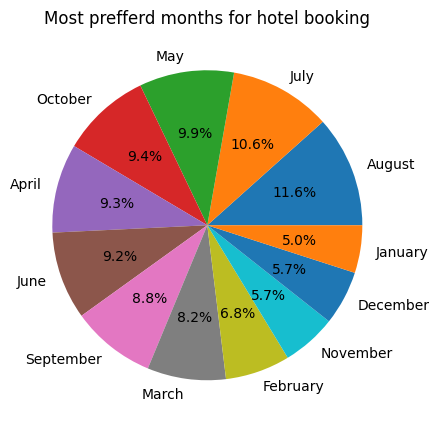

In [73]:
hotel_db['arrival_date_month'].value_counts().plot(kind='pie', title='Most prefferd months for hotel booking', figsize=(5,6), autopct='%1.1f%%', ylabel='')

# **4) From which country the most guests are coming?**

<Axes: title={'center': 'Most guests per country'}>

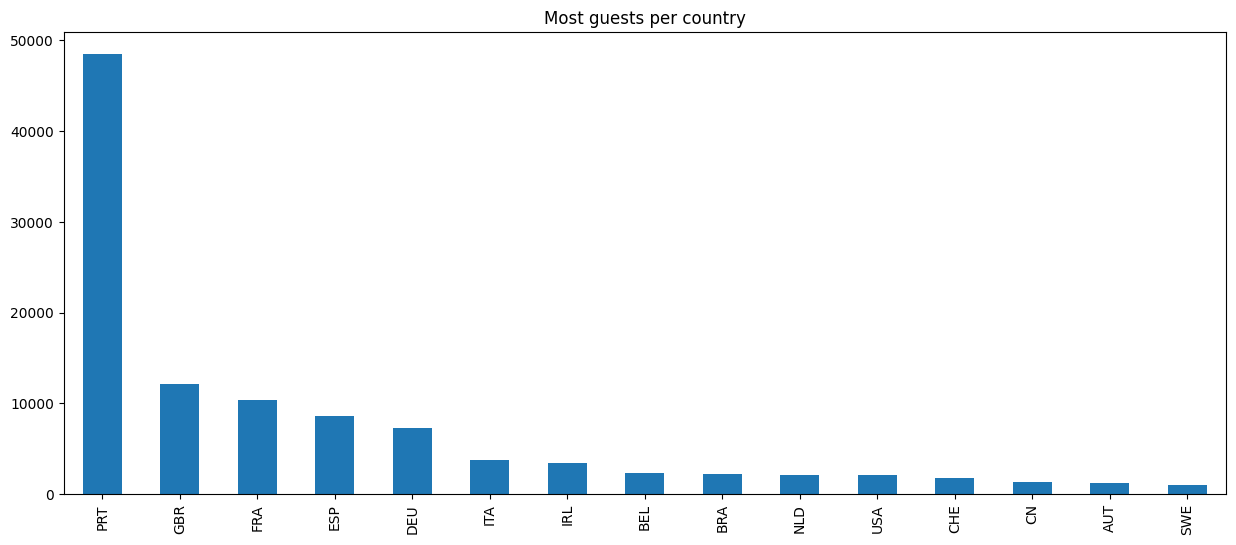

In [74]:
country_db=hotel_db['country'].value_counts()
country_db[country_db>1000].plot(kind='bar', title='Most guests per country' ,figsize=(15,6))

#**5) Majority of customers belong to which market segment?**

<Axes: title={'center': 'Customers per market segment'}>

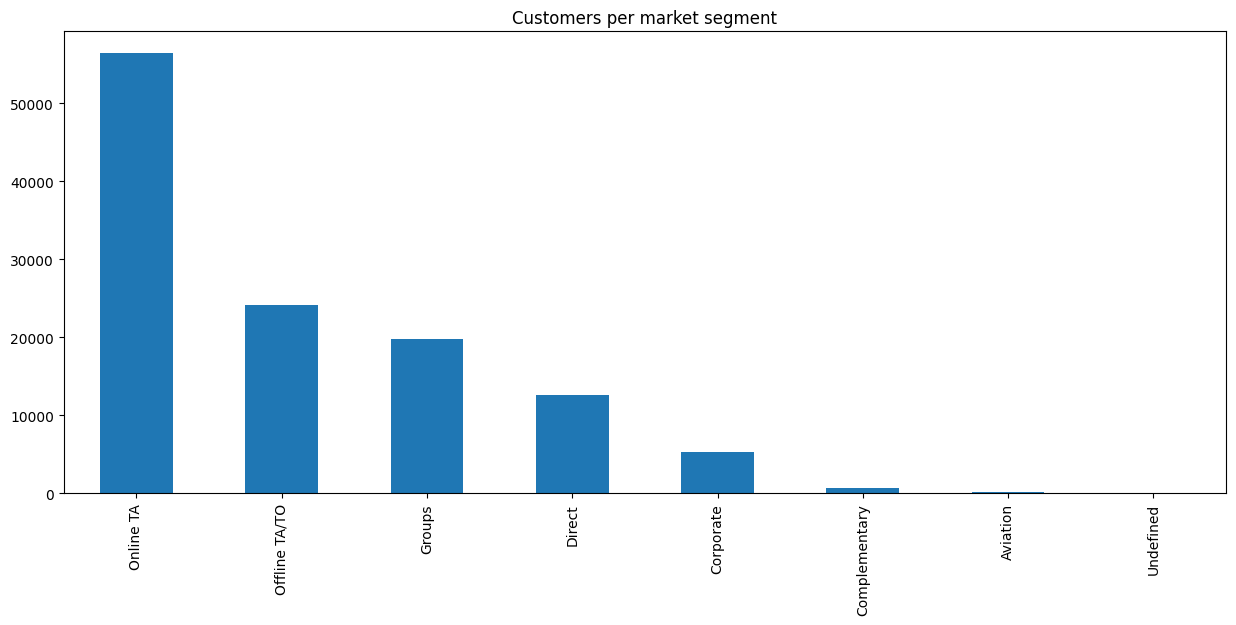

In [75]:
hotel_db['market_segment'].value_counts().plot(kind='bar', title='Customers per market segment' ,figsize=(15,6))

#**6) Which distribution channel is providing most customers?**

<Axes: title={'center': 'Distribution of customers per market segment'}>

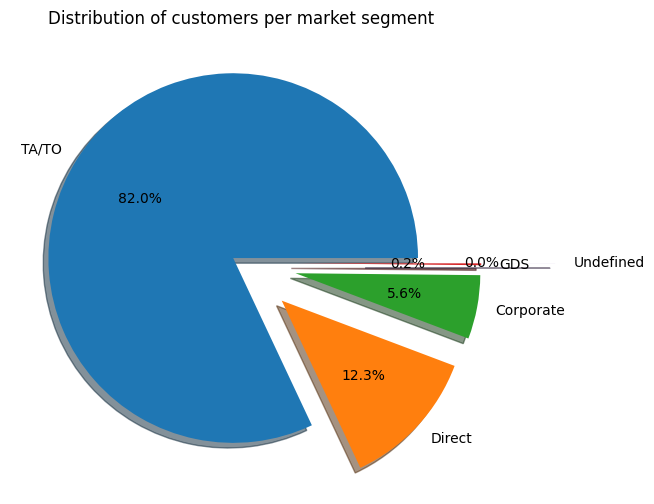

In [76]:
hotel_db['distribution_channel'].value_counts().plot(kind='pie', title='Distribution of customers per market segment', figsize=(15,6), ylabel='', autopct='%1.1f%%', explode=[0.05,0.3,0.3,0.3,0.7], shadow=[0.05,0.05,0.05,0.05,0.05])

#**7) What percentage of guests are repeat guests?**

<Axes: title={'center': 'Percentage of repeat guests'}>

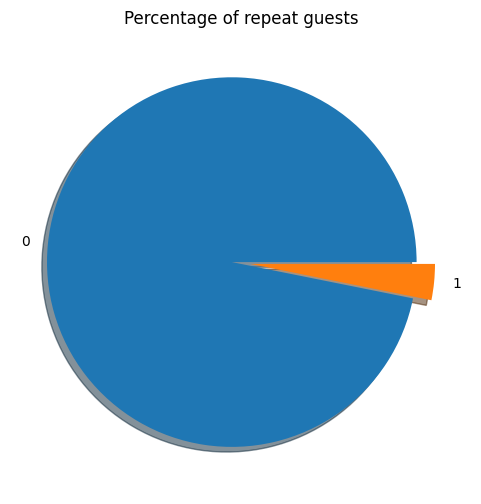

In [77]:
hotel_db['is_repeated_guest'].value_counts().plot(kind='pie', title='Percentage of repeat guests', ylabel='', figsize=(15,6), explode=[0.05,0.05], shadow=[0.05,0.05])

#**8) What percentage of guests are repeat guests?**

<Axes: title={'center': 'Percentage of deposit type'}>

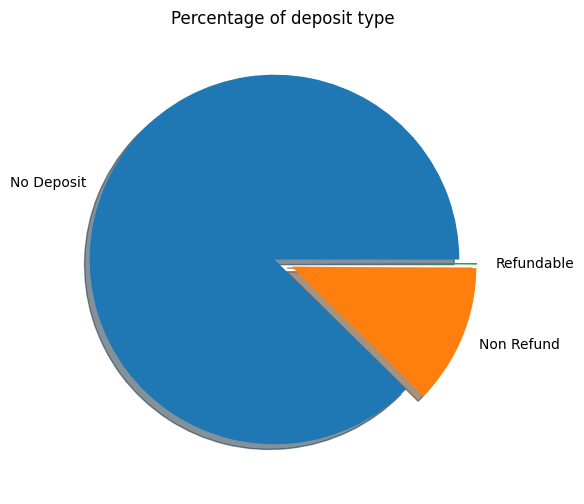

In [78]:
hotel_db['deposit_type'].value_counts().plot(kind='pie', title='Percentage of deposit type', ylabel='', figsize=(15,6), explode=[0.05,0.05,0.05], shadow=[0.05,0.05,0.05])

#**9) Who is the most successfull agent?**

<Axes: title={'center': 'Most successfull agent'}, xlabel='Agent code', ylabel='No.of bookings'>

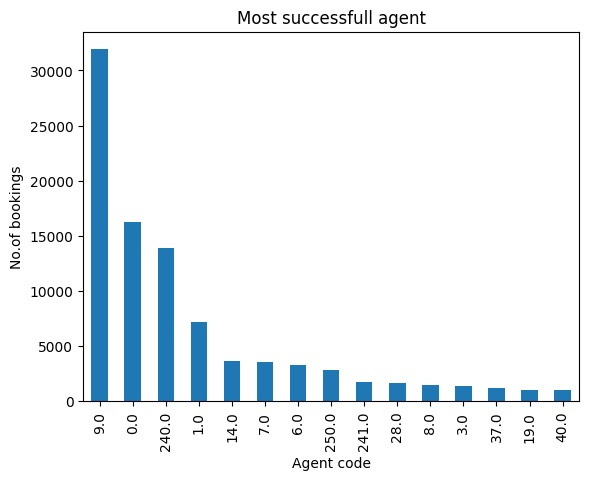

In [79]:
agent_db=hotel_db['agent'].value_counts()
agent_db[agent_db>1000].plot(kind='bar', title='Most successfull agent',xlabel='Agent code',ylabel='No.of bookings')

#**10) Percentage distribution of customers type.**

<Axes: title={'center': 'Percentage distribution of customers type.'}>

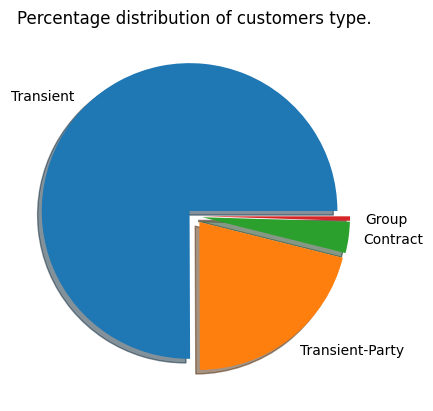

In [80]:
hotel_db['customer_type'].value_counts().plot(kind='pie', title='Percentage distribution of customers type.', explode=[0.05,0.05,0.05,0.05], shadow=[0.05,0.05,0.05,0.05], ylabel='')

#**11)Required car parking spaces**

In [81]:
hotel_parking=hotel_db['required_car_parking_spaces'].value_counts()

<Axes: title={'center': 'Required car parking spaces'}, ylabel='required_car_parking_spaces'>

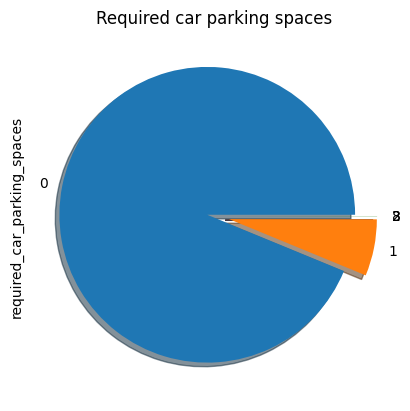

In [82]:
hotel_parking.plot(kind='pie', title='Required car parking spaces',explode=[0.05,0.1,0.1, 0.1, 0.1],shadow=[0.05,0.08,0.08, 0.08, 0.08])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**12) In which months maximum bookings happen?**

In [83]:
# Chart - 2 visualization code

book_per_month = hotel_db.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
book_per_month['arrival_date_month']=pd.Categorical(book_per_month['arrival_date_month'],ordered=True,categories=months)
book_per_month=book_per_month.sort_values('arrival_date_month')
book_per_month

,arrival_date_month,Counts
4,January,5921
3,February,8052
7,March,9768
0,April,11078
8,May,11780
6,June,10929
5,July,12644
1,August,13861
11,September,10500
10,October,11147


Text(0, 0.5, 'Number of bookings')

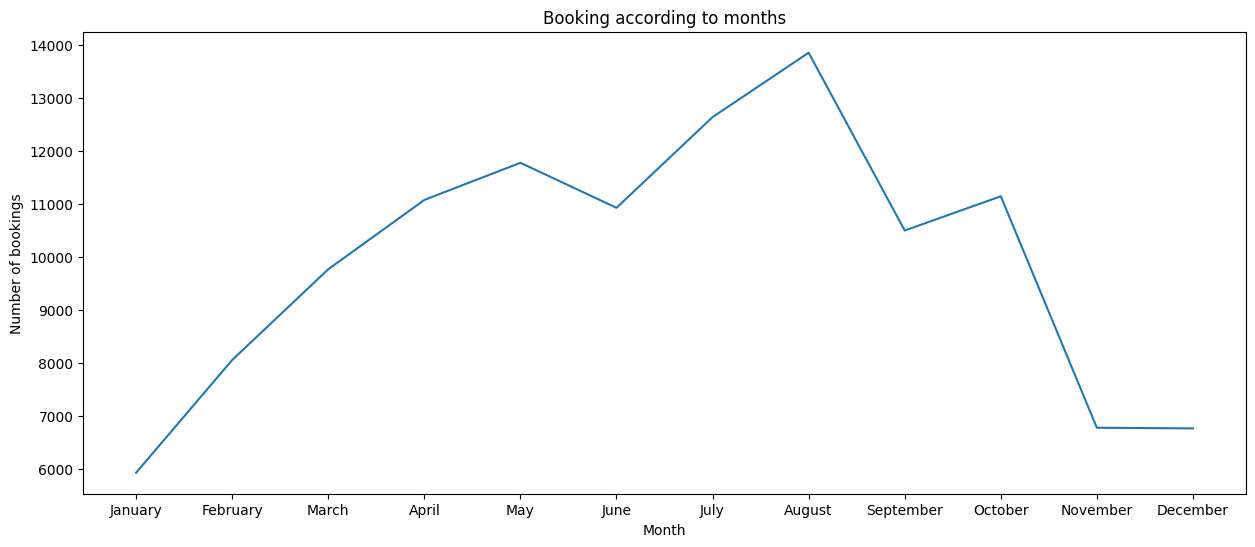

In [84]:
plt.figure(figsize=(15,6))
sns.lineplot(x=book_per_month['arrival_date_month'], y=book_per_month['Counts'])
plt.title('Booking according to months')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

# **13) Which year had the highest booking?**


Text(0.5, 1.0, 'Year wise Bookings')

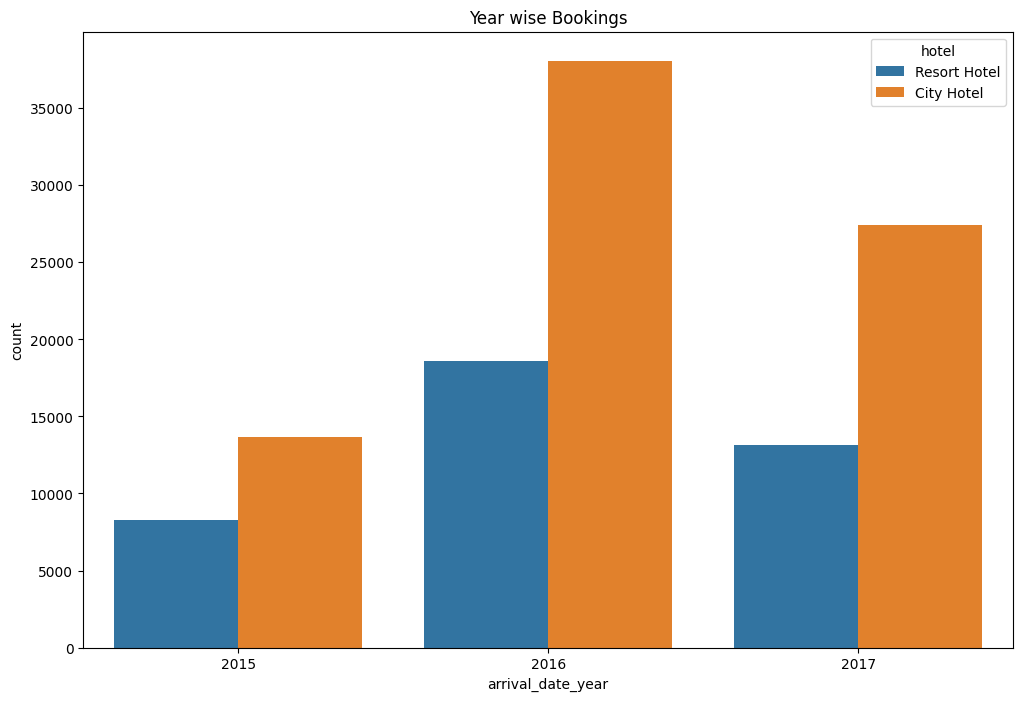

In [85]:
plt.figure(figsize=(12,8))

sns.countplot(x=hotel_db['arrival_date_year'], hue=hotel_db['hotel'])
plt.title('Year wise Bookings')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**Multivariate and Bivariate analysis**

#**Q1) Which type of hotel has lower lead time?**

In [86]:
# Group data by hotel type and calculate average lead time
hotel_grpby=hotel_db.groupby('hotel')['lead_time'].mean().reset_index()

Text(0.5, 1.0, 'Average lead time per hotel type')

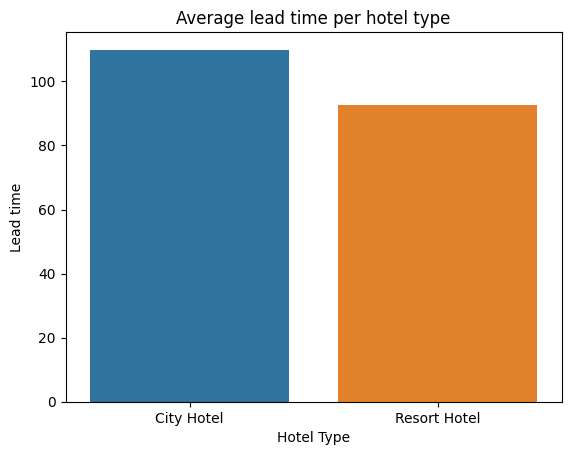

In [87]:
sns.barplot(data=hotel_grpby, x='hotel',y='lead_time')
plt.xlabel('Hotel Type')
plt.ylabel('Lead time')
plt.title('Average lead time per hotel type')

## **Observation**
## A resort hotel has a shorter wait period. Data indicates that guests book their resort visits less in advance.



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

#**Q2) Which hotel type has longer waiting time?**

In [98]:
# group by hotel and average waiting time
hotel_waitime= hotel_db.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
hotel_waitime

,hotel,days_in_waiting_list
0,City Hotel,3.231484
1,Resort Hotel,0.521837


Text(0.5, 1.0, 'Average days on waiting lists for each kind of hotel')

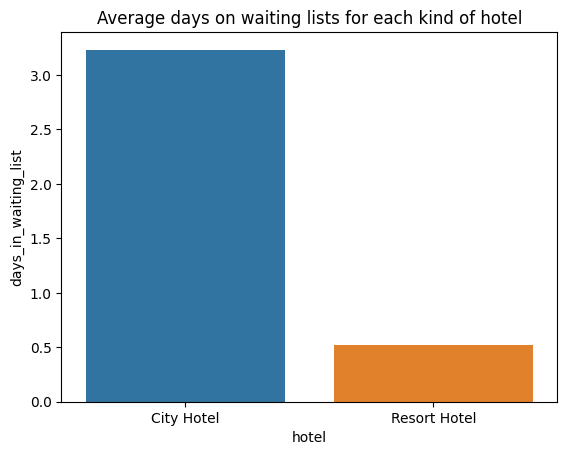

In [101]:
sns.barplot(data=hotel_waitime,x='hotel',y='days_in_waiting_list')
plt.xlabel='Hotel Type'
plt.ylabel='Number of days in waiting list'
plt.title('Average days on waiting lists for each kind of hotel')

##**Observation**
The average number of days in waiting list for city hotels is more then resort hotels so city hotels are much busier then resort hotels.



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [88]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [89]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [90]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [91]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [92]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [93]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [94]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [95]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [96]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [97]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***